


# Laboratorio 2 Clustering

*   **Gustavo Adolfo Tabima Luque - 201914586**
*   **Juan  Carlos Eduardo Nunes Ariza-202010826**
*   **César Luis Moreno González - 201924899**




##Presentación de resultados: [Presentación](https://docs.google.com/presentation/d/1VAVaW-_lVM_bTjS9uN6eMEnEgoI3RJDyJHifkkahtj0/edit?usp=sharing)




---


#1. Lectura de los datos.

ADVERTENCIA: PARA EJECUTAR CREAR UNA CARPETA /data y ahí poner los datos, con el nombre de "datos_empresas"


In [ ]:
# Librerias generales
# Pandas
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Librerías para manejo de datos
import pandas as pd
import numpy as np
np.random.seed(3301)
from sklearn.cluster import KMeans

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#PCA Analisis 
from sklearn.decomposition import PCA
# Normalización
from sklearn.preprocessing import MinMaxScaler
# Estandarización
from sklearn.preprocessing import StandardScaler

#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Libreria para manejar el desbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Seaborn
import seaborn as sns 
# Indicador de la silueta
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib

import matplotlib.pyplot as plt
from pandas.core.dtypes.dtypes import register_extension_dtype

# Ubicacion de la base de datos
db_location = "data/datos_empresas.csv"
#db_location = "202220_Laboratorio_2_data_Empresas_mas_grandes_del_pais.csv"
# Leer los datos

df_emps = pd.read_csv(db_location,sep=';',encoding='utf-8')

df_emps.dropna(inplace = True)
df_emps.drop_duplicates(inplace = True)



#2. Manejo de datos Cualitativos.
Lo primero que hacemos es eliminar duplicados y los datos vacíos, notamos a primera vista que tenemos problemas con algunos datos y debemos revisarlos

In [ ]:
df_emps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1067
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No.                      1038 non-null   int64  
 1   NIT                      1038 non-null   int64  
 2   RAZON SOCIAL             1038 non-null   object 
 3   SUPERVISOR               1038 non-null   object 
 4   REGIÓN                   1038 non-null   object 
 5   DEPARTAMENTO DOMICILIO   1038 non-null   object 
 6   CIUDAD DOMICILIO         1038 non-null   object 
 7   CIIU                     1038 non-null   object 
 8   MACROSECTOR              1038 non-null   object 
 9   ING. OP. 2018            1038 non-null   float64
 10  GANANCIA (PERDIDA) 2018  1038 non-null   float64
 11  TOTAL ACTIVOS 2018       1038 non-null   float64
 12  TOTAL PASIVOS 2018       1038 non-null   float64
 13  TOTAL PATRIMONIO 2018    1038 non-null   float64
 14  ING. OP. 2017           

In [ ]:
df_emps.head(1)

,No.,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,ING. OP. 2018,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,ING. OP. 2017,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
0,1,860003563,ABB LTDA,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,"C2711 - Fabricación de motores, generadores y ...",MANUFACTURA,3.571775e+09,58725480.0,2.956848e+09,2.476739e+09,480108920.0,4.005049e+09,87529000.0,2.875460e+09,2341172480.0,534287070.0,NIIF PLENAS-GRUPO 1


In [ ]:
cols = {'INGRESOS OPERACIONALES\n2018*': 'ING. OP. 2018', 'INGRESOS OPERACIONALES\n2017*':'ING. OP. 2017'}
df_emps.rename(columns = cols, inplace = True)

Procedemos a renombrar algunas columnas para poderlas manejar de manera más apropiada.

In [ ]:

## Funcion para depurar los datos de sleep time, para unicamente
## permitir datos en el rango esperado.
def depurar_float(registro):
  try:
    registro = str(registro)
    num = ''.join(char for char in registro if char.isdigit() or char == '.')
    num = abs(float(num))
    resp = num
  except:
    resp = "Invalid"
  return resp

##
columns = ['ING. OP. 2018', 'GANANCIA (PERDIDA) 2018', 'TOTAL ACTIVOS 2018',
       'TOTAL PASIVOS 2018', 'TOTAL PATRIMONIO 2018', 'ING. OP. 2017',
       'GANANCIA (PERDIDA) 2017', 'TOTAL ACTIVOS 2017', 'TOTAL PASIVOS 2017',
       'TOTAL PATRIMONIO 2017']
for col in columns:
  df_emps[col] = df_emps[col].apply(depurar_float)

In [ ]:
for col in columns:
  df_inv = df_emps[df_emps[col] == "Invalid"]  
  print("Se encontraron " + str(df_inv.shape[0]) + " datos invalidos en la columna " + col)

Se encontraron 0 datos invalidos en la columna ING. OP. 2018
Se encontraron 0 datos invalidos en la columna GANANCIA (PERDIDA) 2018
Se encontraron 0 datos invalidos en la columna TOTAL ACTIVOS 2018
Se encontraron 0 datos invalidos en la columna TOTAL PASIVOS 2018
Se encontraron 0 datos invalidos en la columna TOTAL PATRIMONIO 2018
Se encontraron 0 datos invalidos en la columna ING. OP. 2017
Se encontraron 0 datos invalidos en la columna GANANCIA (PERDIDA) 2017
Se encontraron 0 datos invalidos en la columna TOTAL ACTIVOS 2017
Se encontraron 0 datos invalidos en la columna TOTAL PASIVOS 2017
Se encontraron 0 datos invalidos en la columna TOTAL PATRIMONIO 2017


Ubicamos el registro invalido

In [ ]:
df_i = df_emps[df_emps['TOTAL PASIVOS 2017'] == "Invalid"] 
df_i

,No.,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,ING. OP. 2018,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,ING. OP. 2017,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF


Arreglamos el dato invalido

In [ ]:
df_emps.at[992,'TOTAL PASIVOS 2017']=df_emps.loc[992]["TOTAL ACTIVOS 2017"] - df_emps.loc[992]["TOTAL PATRIMONIO 2017"]

In [ ]:
for col in columns:
  df_inv = df_emps[df_emps[col] == "Invalid"]  
  print("Se encontraron " + str(df_inv.shape[0]) + " datos invalidos en la columna " + col)

Se encontraron 0 datos invalidos en la columna ING. OP. 2018
Se encontraron 0 datos invalidos en la columna GANANCIA (PERDIDA) 2018
Se encontraron 0 datos invalidos en la columna TOTAL ACTIVOS 2018
Se encontraron 0 datos invalidos en la columna TOTAL PASIVOS 2018
Se encontraron 0 datos invalidos en la columna TOTAL PATRIMONIO 2018
Se encontraron 0 datos invalidos en la columna ING. OP. 2017
Se encontraron 0 datos invalidos en la columna GANANCIA (PERDIDA) 2017
Se encontraron 0 datos invalidos en la columna TOTAL ACTIVOS 2017
Se encontraron 0 datos invalidos en la columna TOTAL PASIVOS 2017
Se encontraron 0 datos invalidos en la columna TOTAL PATRIMONIO 2017


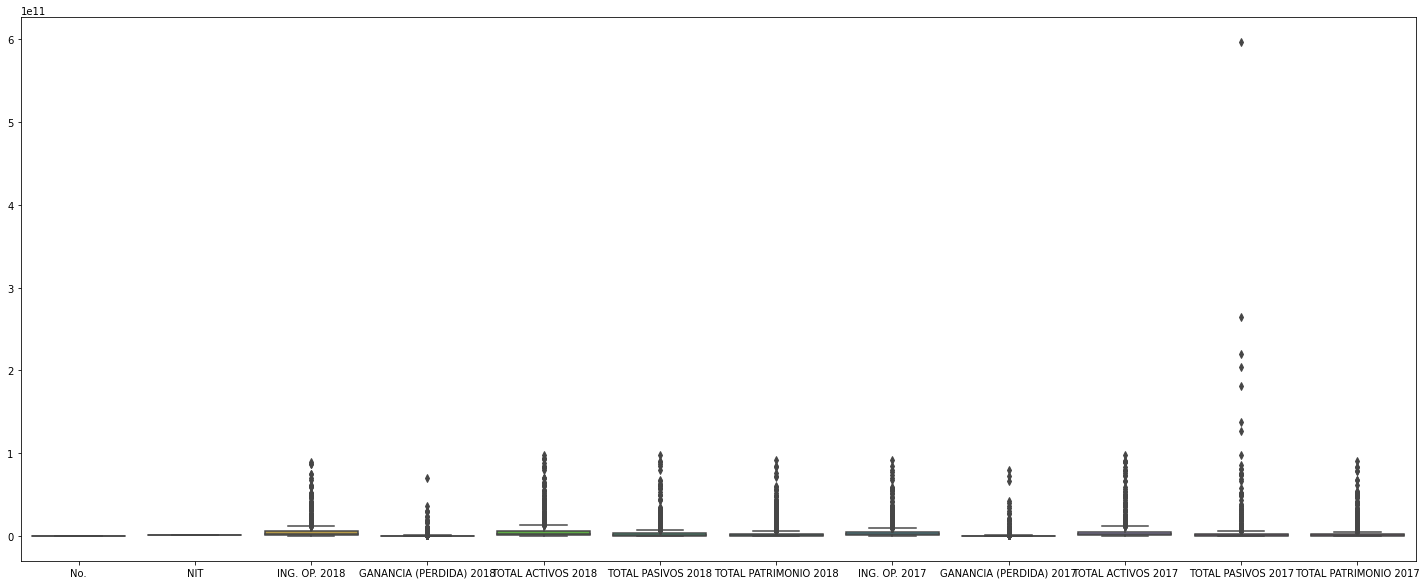

In [ ]:
fig=plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_emps, orient="v")

In [ ]:
X_DF = df_emps.drop(['RAZON SOCIAL','SUPERVISOR','REGIÓN','DEPARTAMENTO DOMICILIO','MACROSECTOR','GRUPO EN NIIF','CIIU','CIUDAD DOMICILIO','No.'],axis=1)
X_DF.head(2)

,NIT,ING. OP. 2018,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,ING. OP. 2017,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
0,860003563,3.571775e+09,58725480.0,2.956848e+09,2.476739e+09,480108920.0,4.005049e+09,87529000.0,2.875460e+09,2.341172e+09,534287070.0
1,900138670,6.018902e+09,35049440.0,1.207011e+09,1.031424e+09,175587330.0,4.994552e+09,10837770.0,1.020832e+09,8.949865e+08,125845490.0


# 3. Presentación de panel de control

Este es el panel de control de laboratorio, mostrando los datos

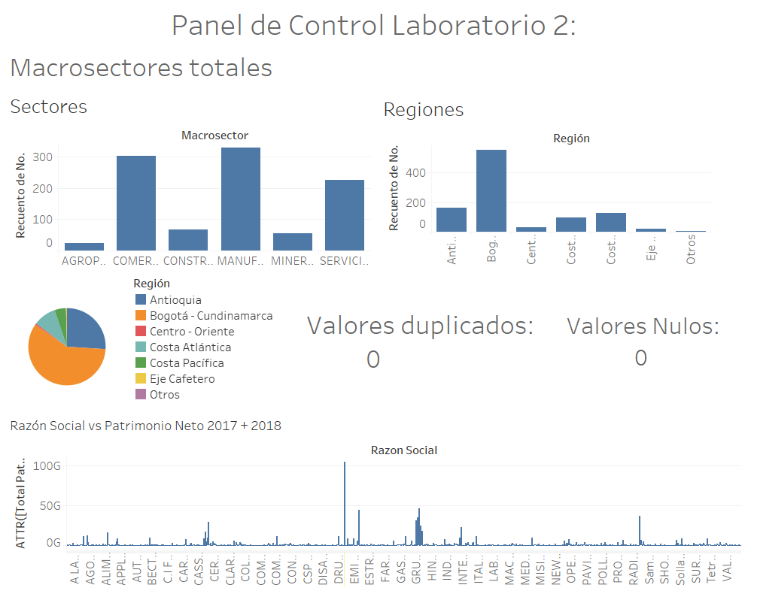


Haciendo estos análisis podemos asumir lo siguiente: El macrosector más común es el Manufacturero, La región más común es Bogotá y es la región que mayor patrimonio genera, adicionalmente el macrosector que mayor patrimonio generó en 2017 y 2018 fue Servicios, aunque Ecopetrol sea la empresa con mayor Patrimonio por sí sola no es una prueba de que en su macro sector se generen las empresas más exitosas.
Ademas vemos que no existen valores duplicados ni nulos, por lo que no tenemos que considerar estos casos, y nos limitamos verificar si los numeros son decimales o no, y arreglar dicha situación.


# 4. Modelos

## 4.1 KMeans
Preparación de los datos con MinMax:

In [ ]:
scaler = StandardScaler()
minmaxscaler = MinMaxScaler()
estandarizador = StandardScaler()
X_DF[X_DF.columns] = estandarizador.fit_transform(X_DF[X_DF.columns])
X_DF.describe()


,NIT,ING. OP. 2018,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,ING. OP. 2017,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
count,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1038.000000,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03,1.038000e+03
mean,-8.094574e-16,-3.080388e-17,1.026796e-17,6.845306e-18,2.395857e-17,0.000000,4.107183e-17,-1.026796e-17,1.369061e-17,1.369061e-17,5.133979e-18
std,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00
min,-1.564117e+00,-6.059519e-01,-2.528792e-01,-5.149805e-01,-4.174574e-01,-0.402574,-5.588266e-01,-2.036656e-01,-4.942002e-01,-2.193602e-01,-3.759781e-01
25%,-7.698651e-01,-4.339019e-01,-2.426503e-01,-4.237218e-01,-3.547657e-01,-0.366567,-4.001670e-01,-1.979565e-01,-4.108588e-01,-1.960266e-01,-3.462186e-01
50%,2.535497e-02,-3.411902e-01,-2.227635e-01,-3.258140e-01,-2.893016e-01,-0.312754,-3.143924e-01,-1.851218e-01,-3.207865e-01,-1.725033e-01,-2.931539e-01
75%,8.458090e-01,-3.414507e-02,-1.546281e-01,-4.293274e-02,-8.904513e-02,-0.126208,-5.204823e-02,-1.433518e-01,-5.402819e-02,-1.014522e-01,-1.325574e-01
max,1.111452e+00,8.224030e+00,1.931560e+01,7.211134e+00,9.012422e+00,8.900081,8.880494e+00,1.526177e+01,7.471665e+00,2.332128e+01,8.895684e+00


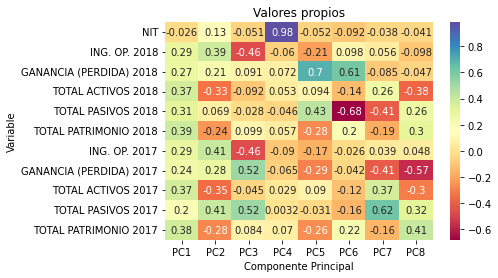

In [ ]:
pca = PCA(n_components = 0.95)
prinComp = pca.fit_transform(X_DF)
df_f= pd.DataFrame(data = prinComp, columns = ["PC" + str(i+1) for i in range(len(pca.components_))])

loadings = pca.components_
num_pc = pca.n_features_
lista_pc = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(lista_pc, loadings)))
loadings_df['variable'] = X_DF.columns.values
loadings_df = loadings_df.set_index('variable')

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.title("Valores propios")
plt.xlabel("Componente Principal")
plt.ylabel("Variable")
plt.show()

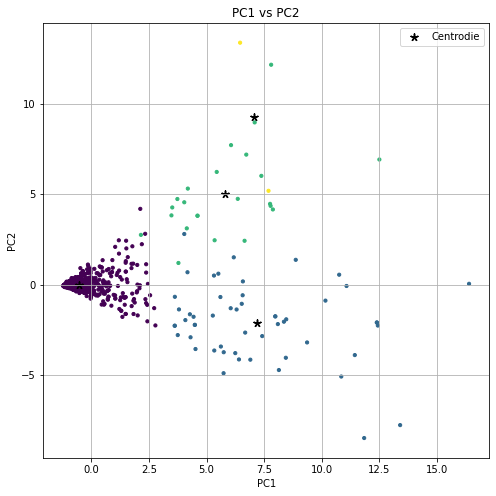

In [ ]:
#Creamos el modelo
kmeans = KMeans(n_clusters=4)

etiquetas = kmeans.fit_predict(df_f)
plt.figure(figsize=(8,8))
df_f = df_f[df_f["PC1"] <50]
plt.scatter(df_f["PC1"],df_f["PC2"],c=etiquetas, s=10)
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black',marker = (5,2), s=50, label = "Centrodie")
plt.legend(loc="best")
plt.title("PC1 vs PC2")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.grid()
plt.show()

Como se puede apreciar hay un grupo de empresas que conforman el centroide principal, se tienen en cuenta las reformas que se hicieron según el coeficiente de silueta del modelo, además que se formaron 4 clusters principales obedeciendo la siguiente tabla:


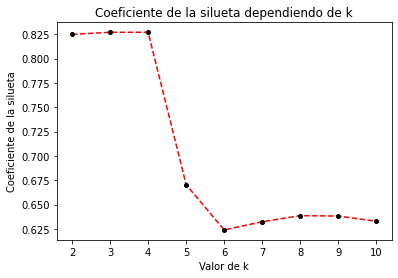

In [ ]:
sil = []
ks = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_f)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_f, labels, metric = 'euclidean'))
  ks.append(k)
plt.plot(ks,sil, c = "red",mfc = "black",mec="k",marker='.', markersize=8, linestyle='dashed')
plt.title("Coeficiente de la silueta dependiendo de k")
plt.xlabel("Valor de k")
plt.ylabel("Coeficiente de la silueta")
plt.show()

In [ ]:
print("Mejor coeficiente de silueta " + str(sil[2]))

Mejor coeficiente de silueta0.827133396818488


## 4.2 Birch - César Luis Moreno González - 201924899

Birch escanea los datos iniciales, y crea un árbol donde reduce los datos en clusters densos y de menor tamaño. Esto permite que posteriormente aplique un algoritmo como KMeans sobre nuevo set de datos creados. Es por ello que contamos con dos Hiperparametros, el numero de clusters y el radio de los puntos que formaran la hoja del arbol, al cual llamaremos threshold.

In [ ]:
df_gm= X_DF.drop("NIT", axis = 1)
# Empezamos estandarizando los valores, para no sumarle más importancia de la debida a alguna columna
ss = StandardScaler()
df_gm[df_gm.columns] = ss.fit_transform(df_gm[df_gm.columns])

Primero, reducimos la dimensionalidad del modelo, cogiendo únicamente los componentes principales más importantes. Por lo que de acá en adelante, expresaremos todo en términos de las variables PC1, PC2 y PC3.

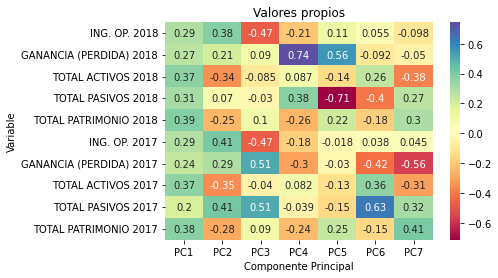

In [ ]:
## Primero reducimos la dimensionalidad, para contar con una varianza explicada de 0.95
pca = PCA(n_components = 0.95)
prinComp = pca.fit_transform(df_gm)
df_f= pd.DataFrame(data = prinComp, columns = ["PC" + str(i+1) for i in range(len(pca.components_))])

components = pca.components_
num_pc = pca.n_features_
lista_pc = ["PC"+str(i) for i in list(range(1, num_pc+1))]
df_components = pd.DataFrame.from_dict(dict(zip(lista_pc, components)))
df_components['variable'] = df_gm.columns.values
df_components = df_components.set_index('variable')

ax = sns.heatmap(df_components, annot=True, cmap='Spectral')
plt.title("Valores propios")
plt.xlabel("Componente Principal")
plt.ylabel("Variable")
plt.show()

Vemos que buscando los hiperarametros resultamos viendo que, con colores morados, contamos con un coeficiente de silueta de 0.87. Aunque este muestra un valor alto, esto resulta con 2 clusters, donde más del 99% de los datos corresponden a un único cluster, por lo que concluimos, con valores donde no sucede esto cuenta con un peor coeficiente, menor a 0.8, no siendo nuestro mejor modelo. 


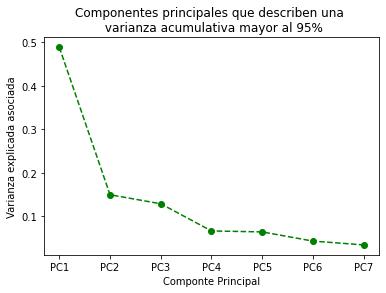

In [ ]:
plt.title('Componentes principales que describen una \n varianza acumulativa mayor al 95%')
plt.xlabel('Componte Principal')
plt.ylabel('Varianza explicada asociada')
varianzas = pca.explained_variance_ratio_
plt.plot(lista_pc[0:7], varianzas, color='green', marker='o', linestyle='dashed')
plt.show()

In [ ]:
kmax = 10
df = pd.DataFrame(columns = [str(i) for i in range(2,11)])
for k in range(2,kmax+1):
  sil = []
  for t in range(5,15):
    b = Birch(n_clusters = k, threshold = t/10).fit(df_f)
    labels = b.labels_
    sil.append(silhouette_score(df_f, labels, metric = 'euclidean'))
  df[str(k)] = sil
df
df["index"] = [(t)/10 for t in range(5,15)]
df = df.set_index("index")

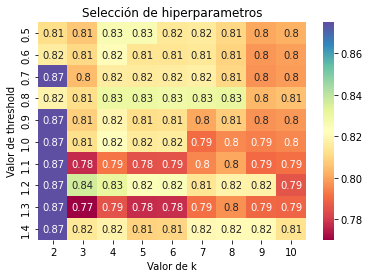

In [ ]:
ax = sns.heatmap(df, annot=True, cmap='Spectral')
plt.title("Selección de hiperparametros")
plt.xlabel("Valor de k")
plt.ylabel("Valor de threshold")
plt.show()

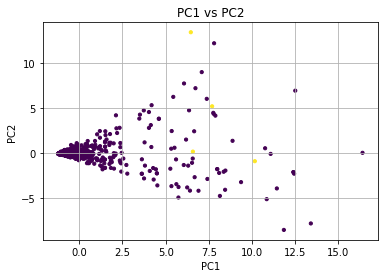

In [ ]:
e = Birch(n_clusters = 2, threshold = 1).fit_predict(df_f)
plt.scatter(df_f["PC1"],df_f["PC2"],c=e, s=10)
plt.title("PC1 vs PC2")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.grid()
plt.show()

Vemos que buscando los hiperarametros resultamos en que, con colores morados, contamos con un coeficiente de silueta de 0.87. Aunque este muestra un valor alto, esto resulta con 2 clusters, donde más del 99% de los datos corresponden a un único cluster, por lo que concluimos, con valores donde no sucede esto cuenta con un peor coeficiente, menor a 0.8, no siendo nuestro mejor modelo. 

#Modelo BDSCAN (Juan Nunes)


---

[Click a este Link](https://colab.research.google.com/drive/192rCxtkF-AcdrRXKk0z90nt-uydMsYjO#scrollTo=lGq9Fm7R5dyk)


# 5. Mejor modelo (Kmeans)

In [ ]:
df_gm

,ING. OP. 2018,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,ING. OP. 2017,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
0,-0.254331,-0.236502,-0.282775,-0.179522,-0.354064,-0.145673,-0.186698,-0.259321,-0.126970,-0.321013
1,-0.013350,-0.243127,-0.420247,-0.318370,-0.384833,-0.043598,-0.201565,-0.410896,-0.184043,-0.363041
2,-0.434786,-0.248079,-0.276968,-0.209610,-0.314950,-0.451548,-0.196150,-0.280555,-0.150340,-0.286813
3,3.366319,8.187661,0.263337,4.338745,3.598670,3.254444,1.901998,0.307249,0.540193,0.595229
4,-0.466276,-0.251651,-0.397340,-0.369699,-0.301387,-0.418435,-0.197365,-0.370979,-0.200017,-0.271133
...,...,...,...,...,...,...,...,...,...,...
1063,-0.469545,-0.246735,-0.475680,-0.391078,-0.379656,-0.436151,-0.202473,-0.441480,-0.203698,-0.350299
1064,-0.367664,-0.250090,-0.448144,-0.360890,-0.375992,-0.324058,-0.196679,-0.428741,-0.197911,-0.349348
1065,-0.361257,-0.247643,-0.453756,-0.368940,-0.374743,-0.330915,-0.200692,-0.432600,-0.200134,-0.348410
1066,-0.161409,-0.242644,-0.461731,-0.363708,-0.390503,-0.079582,-0.198395,-0.432377,-0.194998,-0.361522


In [ ]:
best_model= KMeans(n_clusters = 4).fit(df_f)
etiquetas = best_model.fit_predict(df_f)


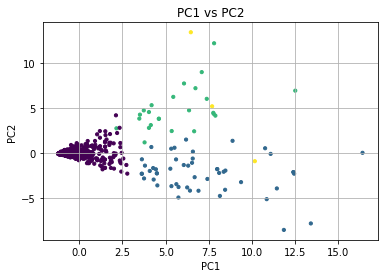

In [ ]:
plt.scatter(df_f["PC1"],df_f["PC2"],c=etiquetas, s=10)
plt.title("PC1 vs PC2")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.grid()
plt.show()

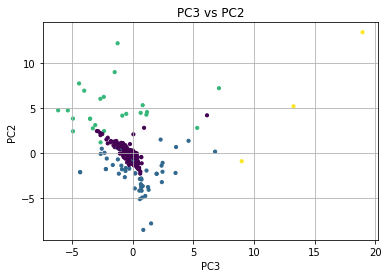

In [ ]:
plt.scatter(df_f["PC3"],df_f["PC2"],c=etiquetas, s=10)
plt.title("PC3 vs PC2")
plt.ylabel("PC2")
plt.xlabel("PC3")
plt.grid()
plt.show()

Nuestro mejor Modelo es Kmeans, dado que es el que se presenta de manera más cercana, mostrando regiones definidas y que presenta un patrón que tiene que ver con una investigación hecha por la Revista Dinero en el año 2019, el clúster corresponde con empresas orientadas al mercado de los hidrocarburos y la extracción de materia, por lo que podemos concluir que las empresas más exitosas de Colombia tienen como buen indicador ser empresas de extracción de hidrocarburos, lo cual se adapta a lo investigado por la revista Dinero.
Fuente: [Mejores empresas 2019 revista Dinero](https://especiales.dinero.com/las-5000-empresas-mas-grandes-de-colombia/index.html)

# 6. Recomendaciones finales


---



Se recomienda que la toma de datos sea realizada de forma más adecuada, dado que hay erroresn o tanto en el ingreso de los datos pero si en la forma de almacenar los mismos en los .CSV, revisar los datos numéricos con . y no con ,

Adicionalmente se tiene en cuenta que los modelos son congruentes, las mejores empresas en Colombia son las de hidrocarburos, teniéndo como mejor regíon de acción bogotá, la empresa que mejor patrimonio generó y que decisiva para este modelaje fue Ecopetrol, es también una de las más grandes nombrada por la fuente de investigación transversal que usamos que fue la revista Dinero.



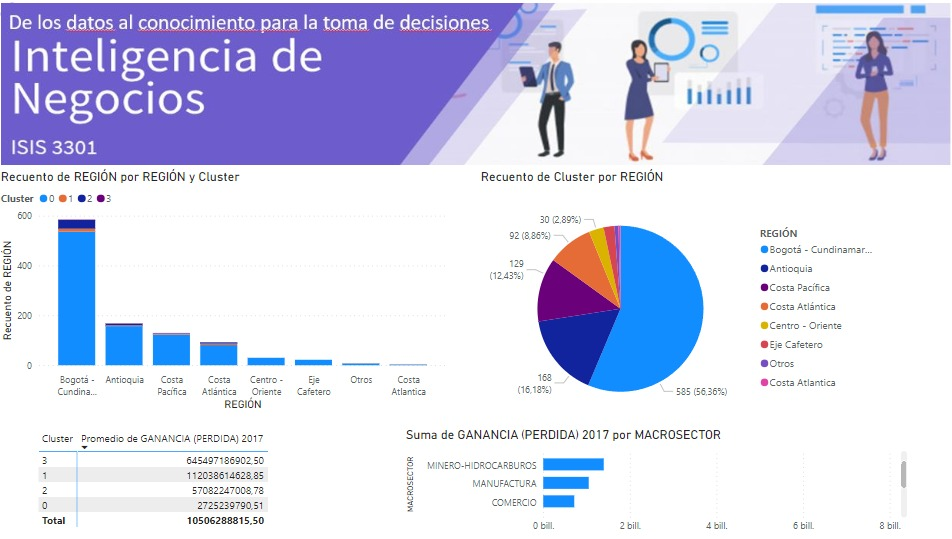

Este tablero nos permite ver lo mencionado de hidrocarburos. Además vemos y recomendamos que las empresas del cluster 0 representan a la pequeña y mediana empresa del pais, representando una fracción minima de lo estudiado. 
Además vemos claramente el pcoo desarrollo en la Costa Atlantica, lo que vemos y recomendamos como areá de exploración en tdod sentido.

Tambien vemos que el cluster 3 representa las empresas con mayores ingresos, donde todas estas se ubican en Bogotá, idea alarmante en terminos del desarrollo uniforme del país.